In [76]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from uuid import uuid4

In [83]:
print(uuid4())

98593d35-82e8-49d5-af5b-5d89b2e23546


**NOTES**

1. In order to use the same set of random numbers go for `np.random.seed(0)`;
2. Points are defined as tuples: (x,y);

In [31]:
class Rectangle:
    '''We'll use rectangle as a canvas, though canvas is a broader term
    TODO:
    - maybe it's good to add a starting point, as it may not always be (0,0) -- maybe useful for drawing many rectangles ✅;
    - maybe worth renaming to Rectangle ✅;

    '''
    def __init__(
            self,
            width: int,
            height: int,
            init_point: tuple[int] = (0,0),
            margin: int = 10
    ):
        self.w = width
        self.h = height
        self.margin = margin
        self.critical_points = [
            (init_point[0], init_point[1]),
            (init_point[0], height),
            (width, height),
            (width, init_point[1])
        ]
        self.critical_all_x = [p[0] for p in self.critical_points] + [self.critical_points[0][0]] # the last point is init point: to properly draw the bottomw side in matplotlib
        self.critical_all_y = [p[1] for p in self.critical_points] + [self.critical_points[0][1]]

    def random_point_by_side_idx(
            self,
            side_number: int,
            margin: int = None,
    ) -> tuple[float]:
        '''1st side is left side, 2nd is the horizontal top, 3rd is vertical right side, 4th is horizontal bottom
        TODO:
        - the random point may not be an integer, but a float. We can add random fraction [0-1] to the result ✅
        - The may be some margin, so we don't pick the corners ✅
        - decide if the margin should be made on init ❌
        - test the function ✅
        '''
        if not margin:
            margin = self.margin

        preset = {
            1: (0, np.random.rand() * (self.h - margin*2) + margin),
            2: (np.random.rand() * (self.w - margin*2) + margin, self.h),
            3: (self.w, np.random.rand() * (self.h - margin*2) + margin),
            4: (np.random.rand() * (self.w - margin*2) + margin, 0)
        }

        return preset[side_number]
    
    @property
    def two_random_points_on_sides(self) -> list[tuple]:
        '''Two random points must be on different sides of rectangle in order to be able to draw a line between them'''
        side_idx = [1,2,3,4]
        random_side_pair = np.random.choice(side_idx, size = 2, replace=False)
        if random_side_pair[1] == random_side_pair[0]:
            raise ValueError(f'Sides should not be the same: {random_side_pair}')
        
        point_a = self.random_point_by_side_idx(random_side_pair[0])
        point_b = self.random_point_by_side_idx(random_side_pair[1])

        return (point_a, point_b)
    
    def __repr__(self):
        return f'---RECTANGLE OBJECT---\n{self.critical_points}. \nAll-x: {self.critical_all_x}.\nAll-y: {self.critical_all_y}'


In [35]:
w = 800
h = 600
# np.random.seed(0)
rect = Rectangle(w, h, init_point=(0,0), margin=10)
print(rect.two_random_points_on_sides)
rect

((188.79107200753197, 600), (800, 311.4324923218002))


---RECTANGLE OBJECT---
[(0, 0), (0, 600), (800, 600), (800, 0)]. 
All-x: [0, 0, 800, 800, 0].
All-y: [0, 600, 600, 0, 0]

In [84]:
class Line:
    '''We can define a line either by giving an input of coefficients a and b, as an equation y = ax + b.
    Or we can define the line if we have two points tha create this line, as only one line can cross two points simulatneously.
    TODO:
     - If we are provided both with a,b and two-points, we need to be sure that these are ok and calculated properly ✅
     - In any case we should end up with a/b coefs, that are most important for further calculations.
    '''
    def __init__(
            self,
            a: float = None,
            b: float = None,
            two_points: tuple[tuple] = None
    ):
        # Checking the inputs
        if not (a and b) and not two_points:
            raise ValueError('You have not provided enough information')
        
        if a and b and two_points:
            a_check, b_check = self.get_line_coefs_given_two_points(two_points)
            if a != a_check or b != b_check:
                raise ValueError('Provided data is not correct. Two points dont match a,b coefs.')
        
        self.id = uuid4()

        if not two_points:
            self.line_type = 'slope'
            self.a = a
            self.b = b
            self.two_points = None
            return 

        self.two_points = two_points
        point_one = two_points[0]
        point_two = two_points[1]
        
        if point_one[0] == point_two[0]:
            self.line_type = 'vertical'
            self.a = 'undefined'
            self.b = 'undefined'
        
        elif point_one[1] == point_two[1]:
            self.line_type = 'horizontal'
            self.a = 0
            self.b = point_one[1]
        
        else:
            self.line_type = 'slope'
            self.a, self.b = self.get_line_coefs_given_two_points(two_points)
        
        self._get_angle()

    
    def get_line_coefs_given_two_points(self, two_points: tuple[tuple]) -> tuple[float]:
        '''We are given two points (x,y) & (x2, y2). We need to identify the line equation for them: y = ax + b'''
        point_one = two_points[0]
        point_two = two_points[1]

        a = (point_two[1] - point_one[1]) / (point_two[0] - point_one[0])
        b = point_one[1] - a * point_one[0]

        # Checking the calculations
        check_val_1 = a*point_one[0] + b - point_one[1]
        check_val_2 = a*point_two[0] + b - point_two[1]
        if np.abs(check_val_1) > 0.0001 or np.abs(check_val_2) > 0.0001:
            raise ValueError(f'Some error. Check1: {check_val_1}. Check2: {check_val_2}')
        
        return (a, b)
    
    
    def _get_angle(self):
        if self.line_type == 'vertical':
            self.angle_rad = np.pi / 2
            self.angle_deg = 90
        elif self.line_type == 'horizontal':
            self.angle_rad = 0
            self.angle_deg = 0
        else:
            self.angle_rad = np.arctan(self.a)
            self.angle_deg = np.rad2deg(self.angle_rad)


    def __repr__(self):
        return f'''
        ---LINE OBJECT---
        Line type: {self.line_type}.
        a: {self.a}.
        b: {self.b}.
        Points to connect: {self.two_points}.
        Angle RAD: {np.round(self.angle_rad,2)}.
        Angle DEG: {self.angle_deg}
        ID: {self.id}'''

In [85]:
my_line = Line(two_points=((0,6), (10,10)))
my_line


        ---LINE OBJECT---
        Line type: slope.
        a: 0.4.
        b: 6.0.
        Points to connect: ((0, 6), (10, 10)).
        Angle RAD: 0.38.
        Angle DEG: 21.80140948635181
        ID: 71fa02fb-627b-4fca-bc9e-cde563a68bf8

In [344]:
canvas_w = 800
canvas_h = 600
critical_points = [(0, 0), (0, canvas_h), (canvas_w, canvas_h), (canvas_w, 0)]
critical_x = [p[0] for p in critical_points] + [critical_points[0][0]]
critical_y = [p[1] for p in critical_points] + [critical_points[0][1]]

rect_sides = [1,2,3,4] # for 1st and 3rd sides x is the same, y changes; for 2nd and 4th sides y is the same, x changes.
random_pair = np.random.choice(rect_sides, 2)
# print(random_pair)

def random_point_by_rect_side(side_number: int, canvas_w: int, canvas_h: int):
    '''1 side is left side, 2 is the horizontal top, 3rd is vertical right side, 4th is horizontal bottom'''
    preset = {
        1: (0, np.random.randint(0, canvas_h)),
        2: (np.random.randint(0, canvas_w), canvas_h),
        3: (canvas_w, np.random.randint(0, canvas_h)),
        4: (np.random.randint(0, canvas_w), 0)
    }

    return preset[side_number]

# print(random_point_by_rect_side(4, canvas_w, canvas_h))

def select_2_random_points_on_rectangle(canvas_w: int, canvas_h: int) -> list[tuple]:
    side_idx = [1,2,3,4]
    random_side_pair = np.random.choice(side_idx, size = 2, replace=False)
    if random_side_pair[1] == random_side_pair[0]:
        raise ValueError(f'Sides should not be the same: {random_side_pair}')
    
    point_a = random_point_by_rect_side(random_side_pair[0], canvas_w, canvas_h)
    point_b = random_point_by_rect_side(random_side_pair[1], canvas_w, canvas_h)

    return [point_a, point_b]

print(select_2_random_points_on_rectangle(canvas_w, canvas_h))

def get_line_coefs_given_two_points(two_points: list[tuple]) -> tuple[float]:
    '''We are given two points (x,y) & (x2, y2). We need to identify the line equation for them: y = ax + b'''
    point_a = two_points[0]
    point_b = two_points[1]

    a_coef = (point_b[1] - point_a[1]) / (point_b[0] - point_a[0])
    b_coef = point_a[1] - a_coef * point_a[0]

    # Checking the calculations
    check_val_1 = a_coef*point_a[0] + b_coef - point_a[1]
    check_val_2 = a_coef*point_b[0] + b_coef - point_b[1]
    if np.abs(check_val_1) > 0.0001 or np.abs(check_val_2) > 0.0001:
        raise ValueError(f'Some error. Check1: {check_val_1}. Check2: {check_val_2}')
    
    return (a_coef, b_coef)

def get_intersection_point_of_two_lines(
        a1: float,
        b1: float,
        a2: float,
        b2: float
) -> tuple[float]:
    
    x = (b2 - b1) / (a1 - a2)
    y = x * a1 + b1

    check_val_1 = a1 * x + b1 - y
    check_val_2 = a2 * x + b2 - y

    if np.abs(check_val_1) > 0.0001 or np.abs(check_val_2) > 0.0001:
        raise ValueError(f'Some error. Check1: {check_val_1}. Check2: {check_val_2}')
    
    return (x, y)

two_points = select_2_random_points_on_rectangle(canvas_w, canvas_h)
print(get_line_coefs_given_two_points(two_points))

# Test case for intersection point

point_a = (0, 0)
point_b = (canvas_w, canvas_h)
point_c = (0, canvas_h)
point_d = (canvas_w, 0)

point_a = (0, 0)
point_b = (canvas_w/2, canvas_h)
point_c = (canvas_w/2, canvas_h)
point_d = (canvas_w, 0)


line_1 = get_line_coefs_given_two_points([point_a, point_b])
line_2 = get_line_coefs_given_two_points([point_c, point_d])

intersect_point = get_intersection_point_of_two_lines(line_1[0], line_1[1], line_2[0], line_2[1])

print(f'Intersection_point: {intersect_point}')



[(0, 335), (159, 0)]
(0.8109161793372319, 184.0)
Intersection_point: (400.0, 600.0)


In [376]:
# Defining a function that generate needed number of lines and stores them as a list

def get_needed_num_of_lines(num_lines: int, canvas_w: int, canvas_h: int):
    list_of_lines = []
    for _ in range(num_lines):
        two_points = select_2_random_points_on_rectangle(canvas_w, canvas_h)
        coeffs = get_line_coefs_given_two_points(two_points)
        line_dict = {'two_points': two_points, 'coeffs': coeffs}
        list_of_lines.append(line_dict)
    
    return list_of_lines

set_of_lines = get_needed_num_of_lines(5, canvas_w, canvas_h)
# print(set_of_lines)

def get_all_intersection_points(set_of_lines: list[dict], canvas_w: int, canvas_h: int):
    pair_of_lines = list(combinations(set_of_lines, 2))
    intersection_points = []
    for idx, el in enumerate(pair_of_lines):
        coefs_1 = el[0]['coeffs']
        coefs_2 = el[1]['coeffs']
        inter_point = get_intersection_point_of_two_lines(coefs_1[0], coefs_1[1], coefs_2[0], coefs_2[1])
        # print(f'{idx}. {inter_point}')
        x = inter_point[0]
        y = inter_point[1]

        # excluding intersections that are out of canvas
        if x < 0 or x > canvas_w or y < 0 or y > canvas_h:
            continue
        
        intersection_points.append(inter_point)
    
    return intersection_points

print(get_all_intersection_points(set_of_lines, canvas_w, canvas_h))




[(295.06502583560075, 417.82077332068593), (715.0607311853885, 390.52105247294975), (342.8061406640485, 414.71760085683684), (21.664303592025423, 251.20282474800203), (320.8134276920557, 433.51256031064673), (406.15610200256606, 130.56852299669492), (541.7649949331752, 244.68748207491245)]


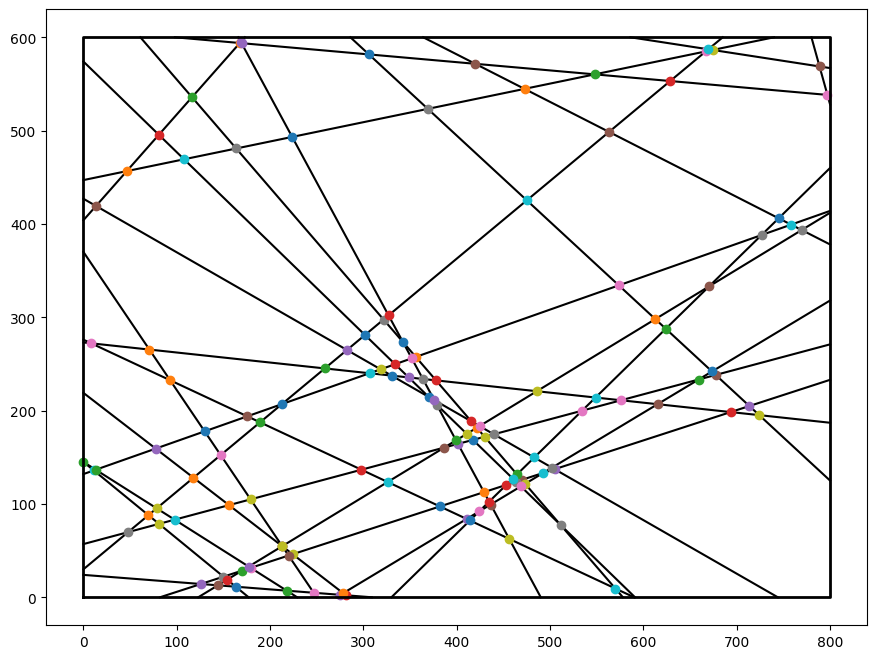

In [382]:
set_of_lines = get_needed_num_of_lines(25, canvas_w, canvas_h)
intersection_points = get_all_intersection_points(set_of_lines, canvas_w, canvas_h)

for line in set_of_lines:
    points = line['two_points']
    plt.plot([p[0] for p in points], [p[1] for p in points], color='k')

for point in intersection_points:
    plt.plot(point[0], point[1], 'o')
plt.plot(critical_x, critical_y, color='k', linewidth=2)
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches((13,8))
plt.show()